<a href="https://colab.research.google.com/github/oshanmay11/my_projects/blob/main/Hyper_parameter_Tuning_To_Decide_Number_of_Hidden_Layers_in_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [72]:
import kagglehub
path = kagglehub.dataset_download("shrutimechlearn/churn-modelling")

Using Colab cache for faster access to the 'churn-modelling' dataset.


In [73]:
import os

df = pd.read_csv(os.path.join(path, 'Churn_Modelling.csv'))

In [74]:
x = df.iloc[:,:-1] # Keep x as a DataFrame
y = df.iloc[:,-1].values

# Correctly one-hot encode 'Geography' and 'Gender' from the DataFrame
geography_dummies = pd.get_dummies(x['Geography'], drop_first=True, dtype=int)
gender_dummies = pd.get_dummies(x['Gender'], drop_first=True, dtype=int)

In [75]:
# x is already a DataFrame, no need for pd.DataFrame(x)
x = pd.concat([x, geography_dummies, gender_dummies], axis=1)

In [76]:
# Select only the relevant numerical features and the one-hot encoded columns
# This implicitly drops 'RowNumber', 'CustomerId', 'Surname', and the original 'Geography', 'Gender' columns.
x = x[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male']]

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# x_train and x_test should already contain the correct 11 feature columns
# due to previous preprocessing in XPLXae8M2wWd. No explicit selection needed here.

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [80]:
classifier = Sequential()
classifier.add(Dense(units=10,kernel_initializer='he_normal',activation='relu',input_dim=11))
classifier.add(Dense(units=20,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=15,kernel_initializer='he_normal',activation='relu'))
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [81]:
model_history = classifier.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.7944 - loss: 0.5112 - val_accuracy: 0.8042 - val_loss: 0.4663
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8112 - loss: 0.4428 - val_accuracy: 0.8122 - val_loss: 0.4362
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8197 - loss: 0.4129 - val_accuracy: 0.8232 - val_loss: 0.4167
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8384 - loss: 0.3850 - val_accuracy: 0.8323 - val_loss: 0.3946
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8447 - loss: 0.3723 - val_accuracy: 0.8402 - val_loss: 0.3862
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8481 - loss: 0.3589 - val_accuracy: 0.8360 - val_loss: 0.3866
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8460 - loss: 0.3561 - val_accuracy: 0.8440 - val_loss: 0.3807
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8530 - loss: 0.3465 - val_accu

In [83]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


Text(0.5, 0, 'Epoch')

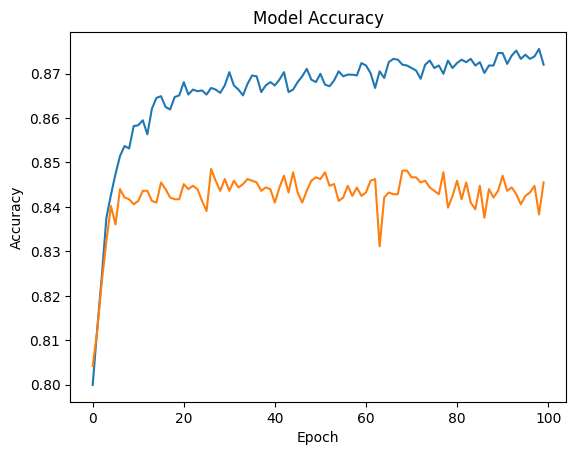

In [84]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')